In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from skynet.solvers.classifier_trainer import ClassifierTrainer
from skynet.utils.gradient_check import eval_numerical_gradient
from skynet.neural_network.classifiers.convnet import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from skynet.neural_network.activation_statistics import activation_statistics

# Initialize with all zeroes

input layer had mean -0.002186 and std 1.000192
hidden layer 1 had mean 0.000000 and std 0.000000
hidden layer 2 had mean 0.000000 and std 0.000000
hidden layer 3 had mean 0.000000 and std 0.000000
hidden layer 4 had mean 0.000000 and std 0.000000
hidden layer 5 had mean 0.000000 and std 0.000000
hidden layer 6 had mean 0.000000 and std 0.000000
hidden layer 7 had mean 0.000000 and std 0.000000
hidden layer 8 had mean 0.000000 and std 0.000000
hidden layer 9 had mean 0.000000 and std 0.000000
hidden layer 10 had mean 0.000000 and std 0.000000


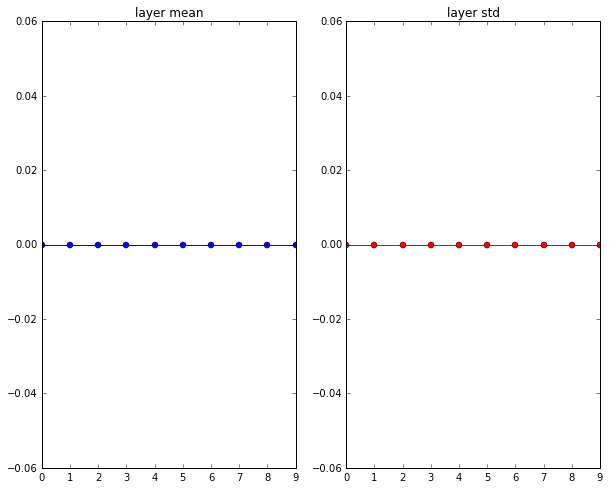

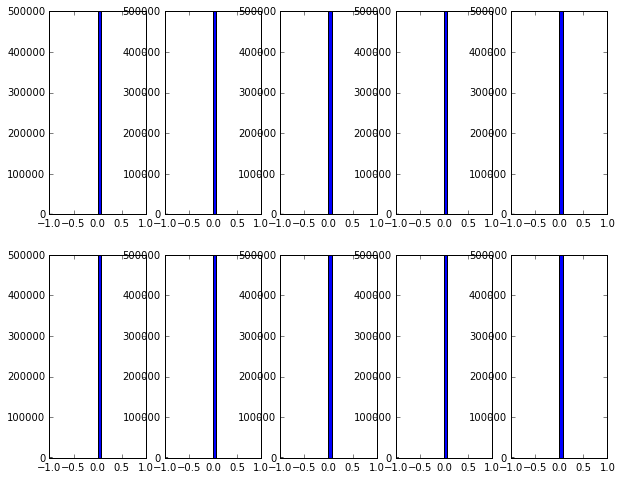

In [3]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 0)

# Initialize with Small Values

input layer had mean -0.002169 and std 1.001230
hidden layer 1 had mean -0.000396 and std 0.214128
hidden layer 2 had mean 0.000028 and std 0.047791
hidden layer 3 had mean -0.000013 and std 0.010739
hidden layer 4 had mean -0.000000 and std 0.002393
hidden layer 5 had mean -0.000000 and std 0.000538
hidden layer 6 had mean -0.000000 and std 0.000120
hidden layer 7 had mean 0.000000 and std 0.000027
hidden layer 8 had mean -0.000000 and std 0.000006
hidden layer 9 had mean -0.000000 and std 0.000001
hidden layer 10 had mean -0.000000 and std 0.000000


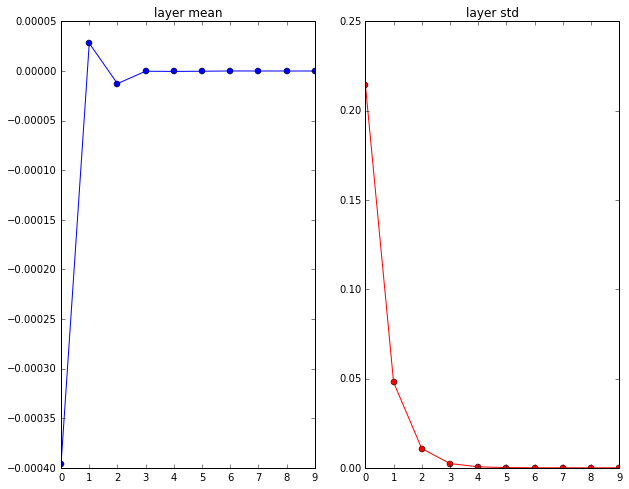

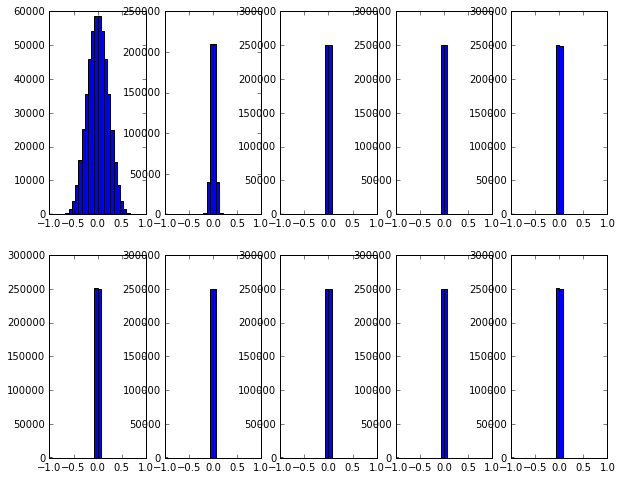

In [4]:
activation_statistics(
    init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 0.01)

# Initialize with Large Values

input layer had mean 0.000455 and std 1.000575
hidden layer 1 had mean 0.001811 and std 0.982009
hidden layer 2 had mean -0.001349 and std 0.981538
hidden layer 3 had mean 0.001554 and std 0.981599
hidden layer 4 had mean 0.000752 and std 0.981851
hidden layer 5 had mean -0.000010 and std 0.981798
hidden layer 6 had mean 0.001952 and std 0.981736
hidden layer 7 had mean 0.001585 and std 0.981635
hidden layer 8 had mean 0.001435 and std 0.981609
hidden layer 9 had mean -0.001435 and std 0.981757
hidden layer 10 had mean 0.000350 and std 0.981810


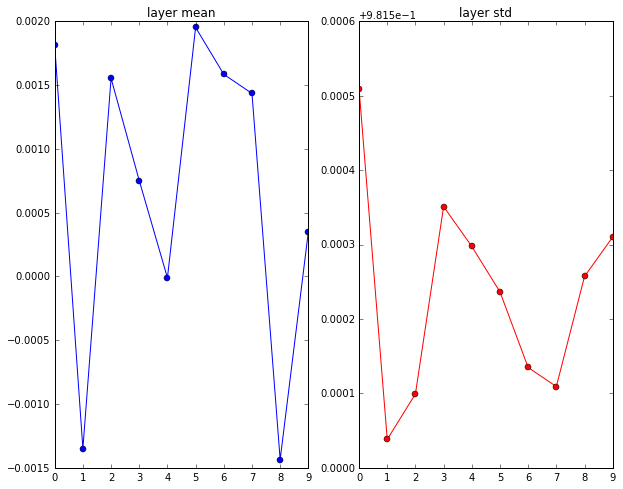

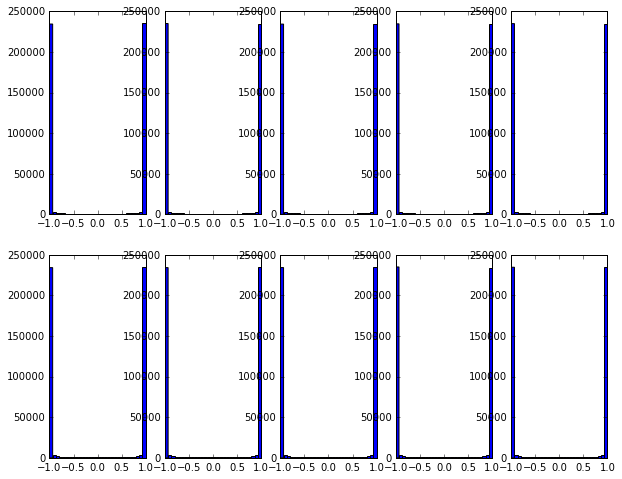

In [5]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 1)

input layer had mean 0.000913 and std 1.000185
hidden layer 1 had mean -0.001192 and std 0.998212
hidden layer 2 had mean -0.000483 and std 0.998295
hidden layer 3 had mean 0.000484 and std 0.998218
hidden layer 4 had mean 0.001580 and std 0.998192
hidden layer 5 had mean -0.002197 and std 0.998235
hidden layer 6 had mean 0.002079 and std 0.998263
hidden layer 7 had mean -0.001255 and std 0.998223
hidden layer 8 had mean -0.002893 and std 0.998230
hidden layer 9 had mean -0.001421 and std 0.998187
hidden layer 10 had mean 0.000986 and std 0.998153


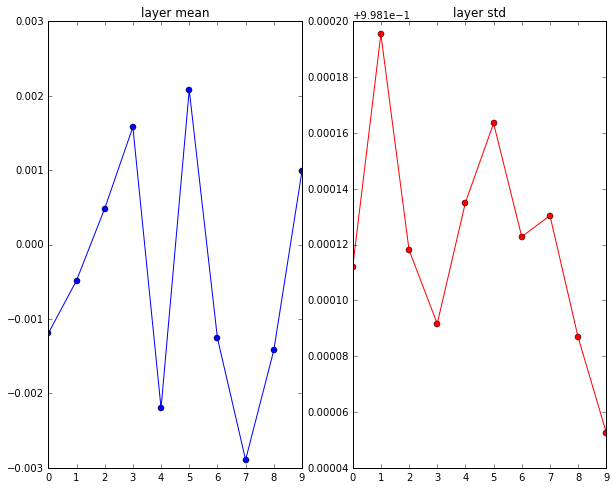

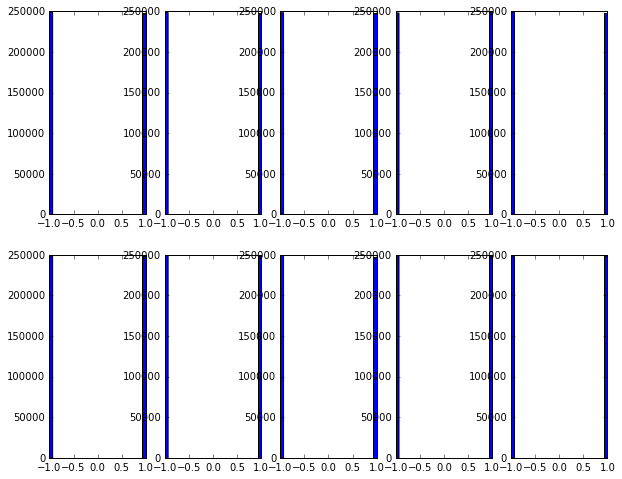

In [6]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 10)

# Initialize with Gaussian distribution

input layer had mean -0.002867 and std 0.998725
hidden layer 1 had mean -0.000023 and std 0.384053
hidden layer 2 had mean -0.000009 and std 0.166719
hidden layer 3 had mean -0.000067 and std 0.074103
hidden layer 4 had mean -0.000020 and std 0.033174
hidden layer 5 had mean -0.000009 and std 0.014806
hidden layer 6 had mean -0.000017 and std 0.006646
hidden layer 7 had mean -0.000004 and std 0.002992
hidden layer 8 had mean 0.000003 and std 0.001339
hidden layer 9 had mean 0.000000 and std 0.000598
hidden layer 10 had mean 0.000000 and std 0.000267


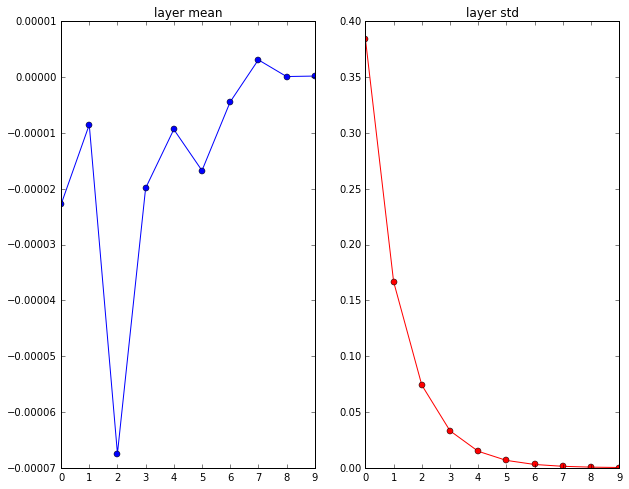

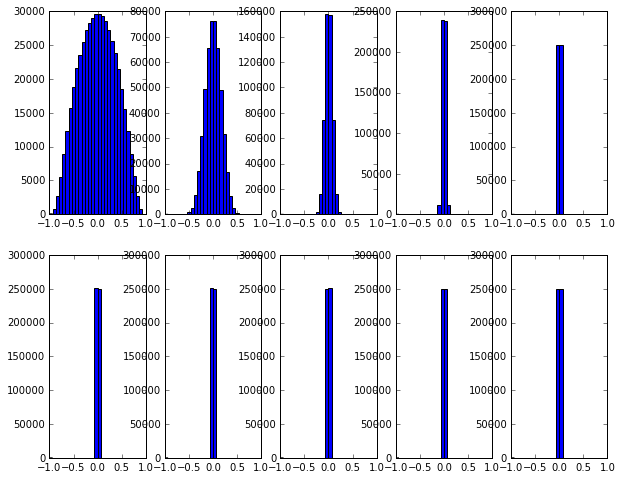

In [7]:
activation_statistics(
    init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 2e-2)

# Initialize with Xavier method
Calibrating the variances with $1/\sqrt{n}$

input layer had mean -0.001415 and std 0.999260
hidden layer 1 had mean -0.001586 and std 0.720857
hidden layer 2 had mean -0.000260 and std 0.632825
hidden layer 3 had mean 0.000344 and std 0.595305
hidden layer 4 had mean 0.000127 and std 0.575719
hidden layer 5 had mean -0.000427 and std 0.568258
hidden layer 6 had mean 0.000339 and std 0.562271
hidden layer 7 had mean 0.000536 and std 0.559207
hidden layer 8 had mean -0.000304 and std 0.557433
hidden layer 9 had mean -0.000077 and std 0.556310
hidden layer 10 had mean -0.000217 and std 0.556419


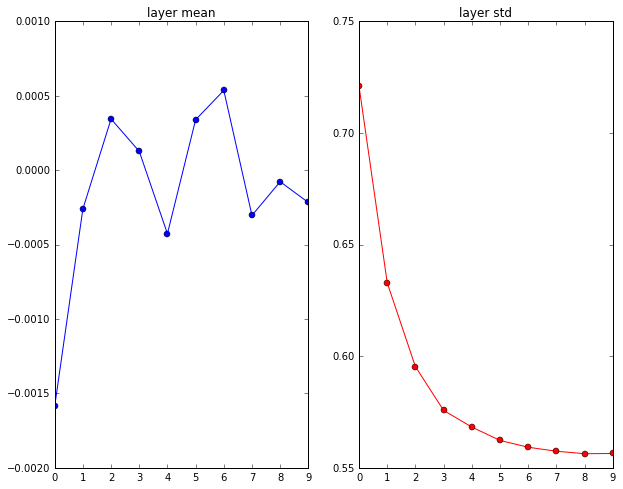

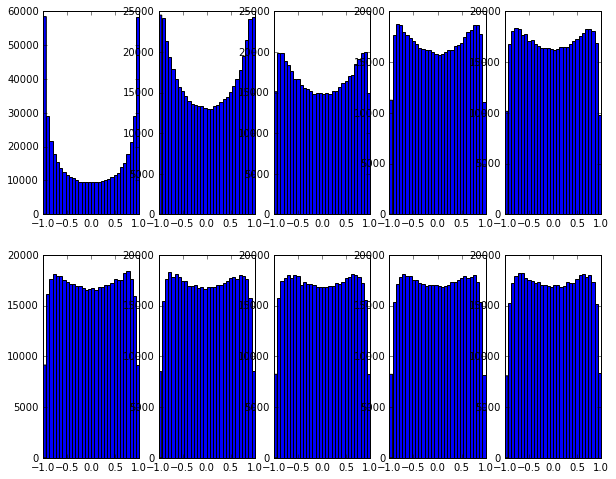

In [8]:
activation_statistics(
    init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * np.sqrt(2.0/fan_in))

# Concerns for RELU

input layer had mean 0.000754 and std 1.000019
hidden layer 1 had mean 0.397887 and std 0.583002
hidden layer 2 had mean 0.269230 and std 0.405760
hidden layer 3 had mean 0.196475 and std 0.287618
hidden layer 4 had mean 0.140665 and std 0.208887
hidden layer 5 had mean 0.097662 and std 0.149103
hidden layer 6 had mean 0.073546 and std 0.106923
hidden layer 7 had mean 0.047860 and std 0.072744
hidden layer 8 had mean 0.035142 and std 0.051528
hidden layer 9 had mean 0.023129 and std 0.034390
hidden layer 10 had mean 0.016175 and std 0.023849


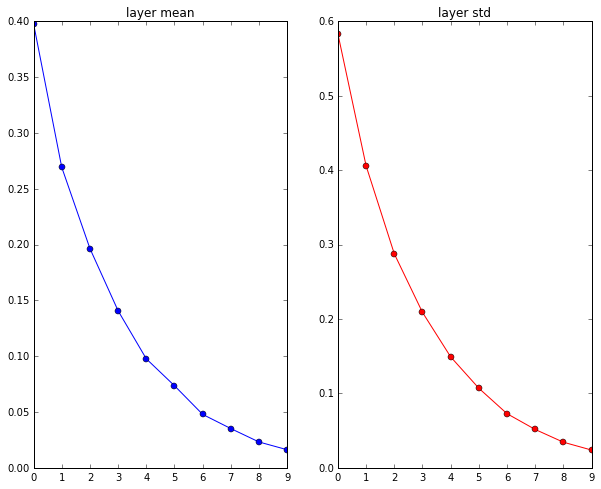

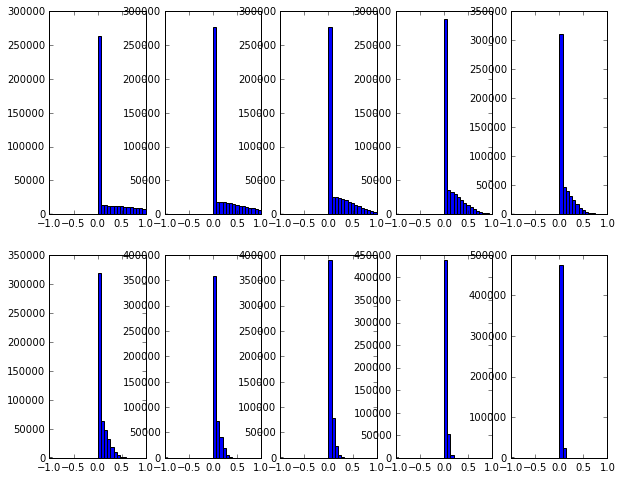

In [9]:
activation_statistics(
    init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * np.sqrt(1.0 / fan_in),
                     nonlinearity='relu')

input layer had mean 0.001214 and std 0.998806
hidden layer 1 had mean 0.567940 and std 0.829919
hidden layer 2 had mean 0.514911 and std 0.791673
hidden layer 3 had mean 0.508553 and std 0.765825
hidden layer 4 had mean 0.455017 and std 0.699211
hidden layer 5 had mean 0.446565 and std 0.651212
hidden layer 6 had mean 0.441225 and std 0.648835
hidden layer 7 had mean 0.475456 and std 0.690518
hidden layer 8 had mean 0.507161 and std 0.725229
hidden layer 9 had mean 0.473174 and std 0.710854
hidden layer 10 had mean 0.436205 and std 0.647783


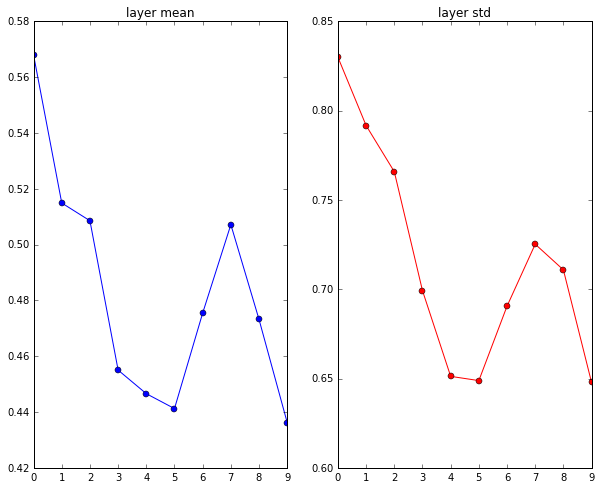

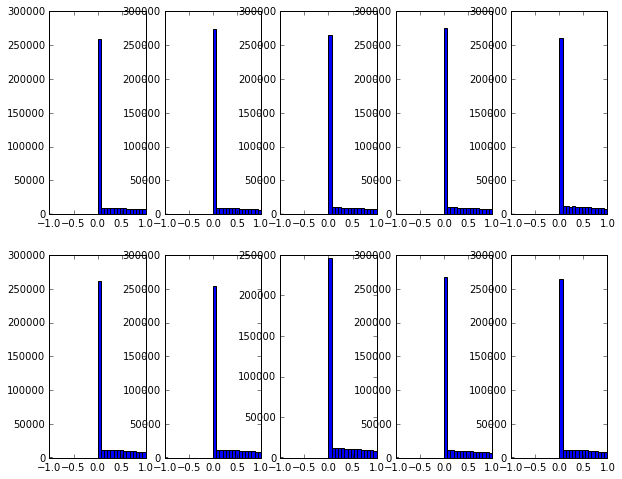

In [10]:
activation_statistics(
    init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * np.sqrt(2.0 / fan_in),
                     nonlinearity='relu')